## Import libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

## Data understanding

In [2]:
data = pd.read_csv("german_credit_data.csv")

In [3]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
data.drop(data.columns[0], inplace=True, axis=1)

In [5]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [7]:
print("Missing values in each column:\n{}".format(data.isnull().sum()))

Missing values in each column:
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


Out of 8 columns 2 contain missing values. Probably these are customers who don’t have one of these two accounts.

In [8]:
print("Unique values in each categorical column:")
for col in data.select_dtypes(include=[object]):
    print(col,":", data[col].unique())

Unique values in each categorical column:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' nan 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [9]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


## Exploratory Data Analysis

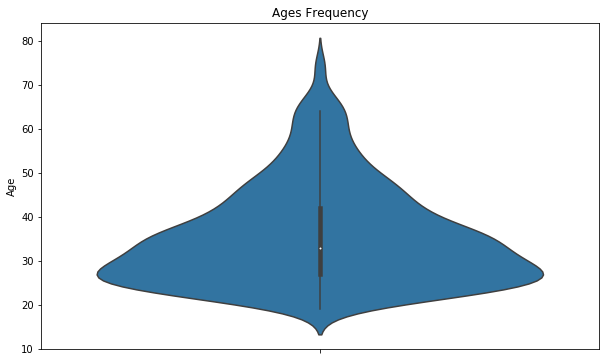

In [10]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=data["Age"])
plt.show()

In [11]:
def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

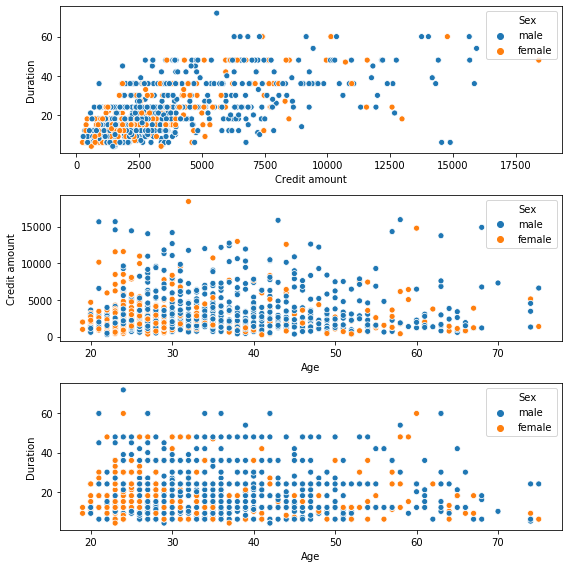

In [12]:
scatters(data, h="Sex")

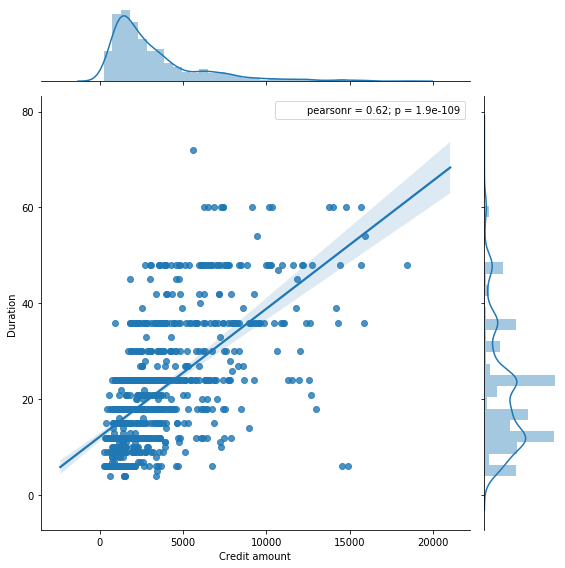

In [13]:
import scipy.stats as stats
r1 = sns.jointplot(x="Credit amount",y="Duration", data=data, kind="reg", height=8)
r1.annotate(stats.pearsonr)
plt.show()

The plot above shows a linear correlation with Pearson value of 0.62 and very small p-value. That make’s sense because usually, people take bigger credits for longer periods. Below I will analyse linear regression plots with various categorisations.

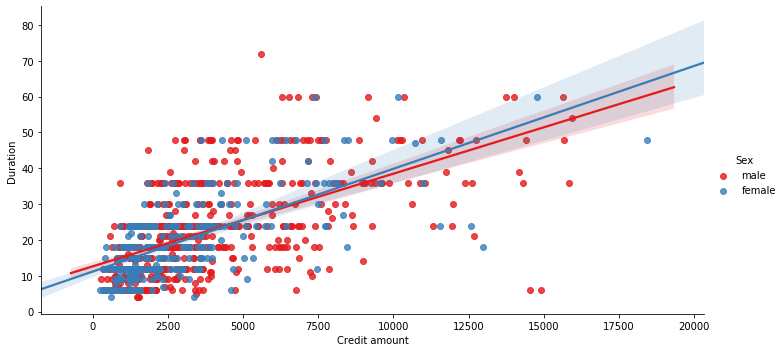

In [14]:
sns.lmplot(x="Credit amount",y="Duration", hue="Sex", data=data, palette="Set1", aspect=2)
plt.show()

 there is no significant difference between men and women.

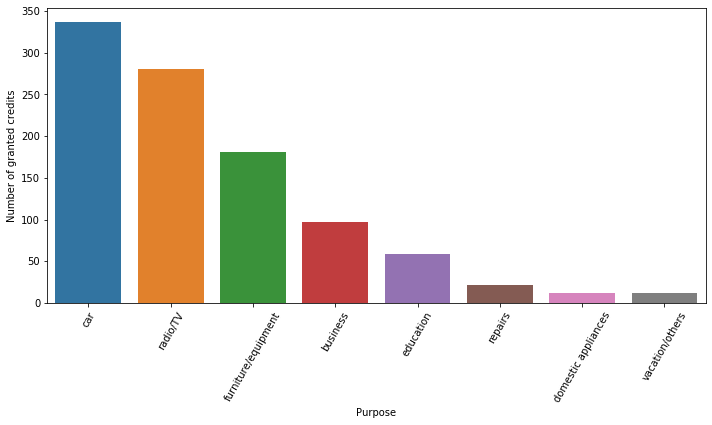

In [15]:
n_credits = data.groupby("Purpose")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Number of granted credits")
plt.tight_layout()

The barplot above shows how many credits were granted for various purposes. Most of credits were granted for car and radio/TV.

In [16]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=data)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

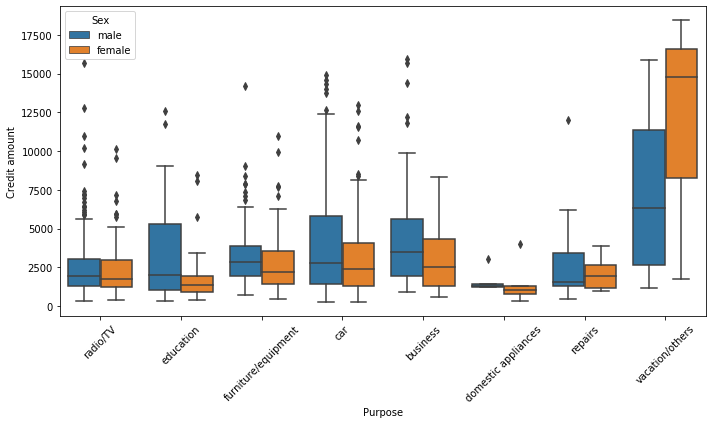

In [17]:
boxes("Purpose","Credit amount","Sex")

The plot above shows that the biggest amounts are taken for vacations/others, the smallest for domestic appliances.

Most of them have outliers on the upper side of the boxes (higher amounts).

In most of the cases there is no difference between men and women, despite category vacation/others. But one must remember that there was very little number of credits granted in this category.

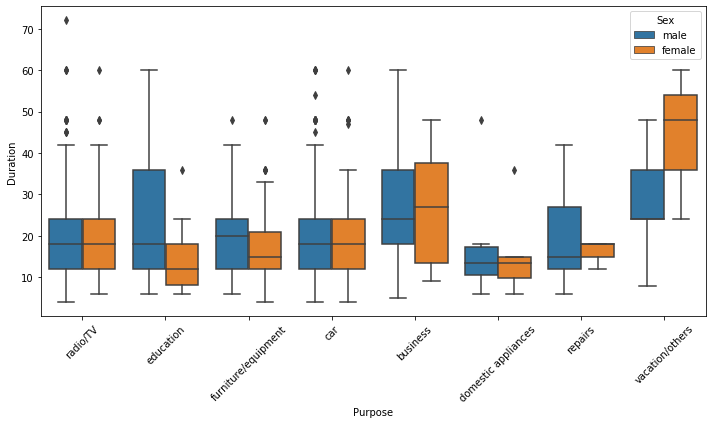

In [18]:
boxes("Purpose","Duration","Sex")

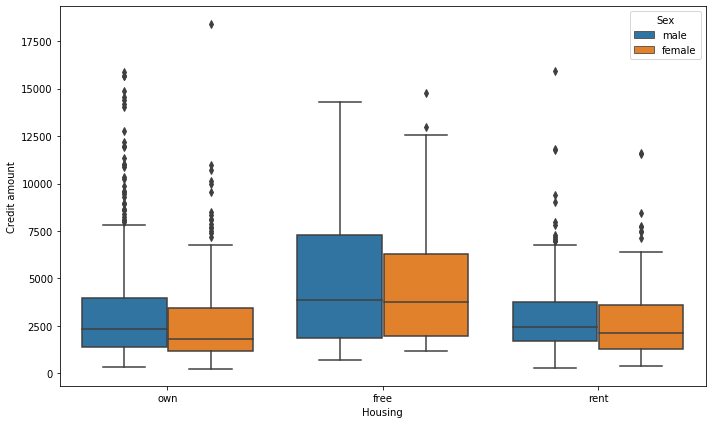

In [19]:
boxes("Housing","Credit amount","Sex",r=0)

In terms of housing category, there is no big difference despite people having “free” housing tend to take slightly bigger credit amounts.

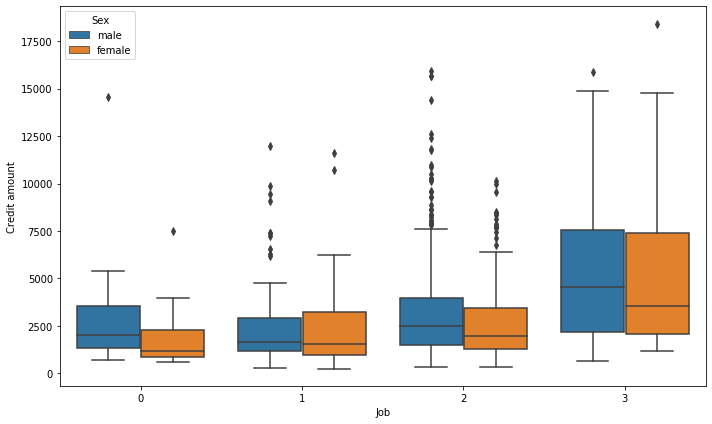

In [20]:
boxes("Job","Credit amount","Sex",r=0)

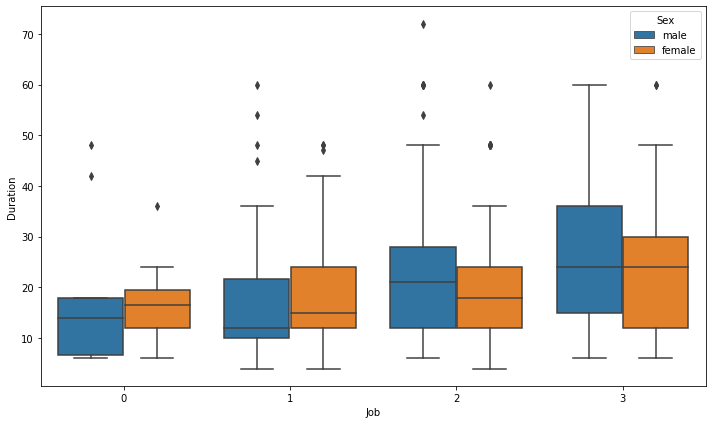

In [21]:
boxes("Job","Duration","Sex",r=0)

In terms of job category once again there is no difference between men and women, but we can see that job category 3 tends to take bigger credit amounts for longer duration.

Text(0.5, 0, 'Age')

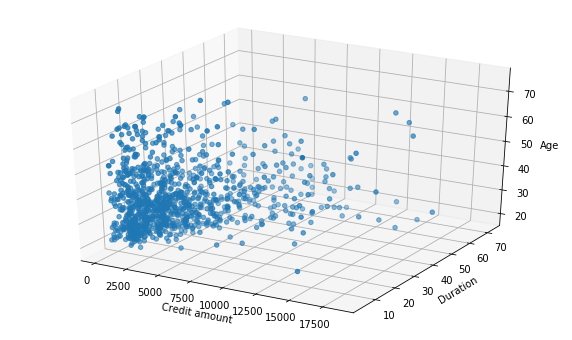

In [22]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Credit amount"], data["Duration"], data["Age"])
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

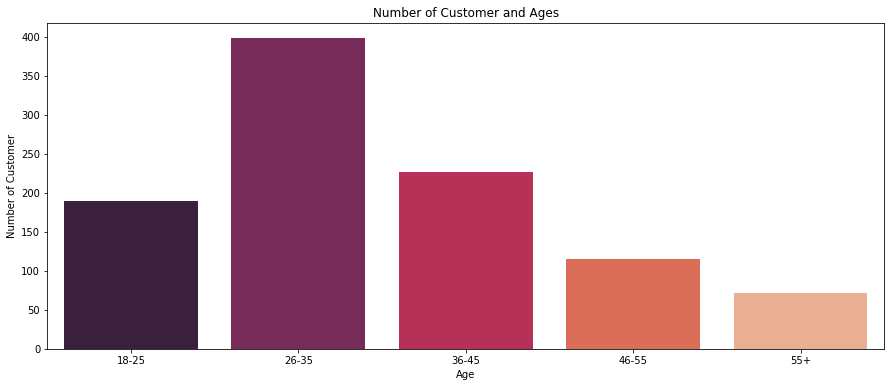

In [23]:
age18_25 = data.Age[(data.Age <= 25) & (data.Age >= 18)]
age26_35 = data.Age[(data.Age <= 35) & (data.Age >= 26)]
age36_45 = data.Age[(data.Age <= 45) & (data.Age >= 36)]
age46_55 = data.Age[(data.Age <= 55) & (data.Age >= 46)]
age55above = data.Age[data.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

## preprocessing

### Filling missing values with mode

In [27]:
#Filling missing values with mode
data["Saving accounts"].fillna(data['Saving accounts'].mode()[0], inplace=True)
data["Checking account"].fillna(data['Checking account'].mode()[0], inplace=True)

### check for oultiers

In [29]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def has_outliers(dataframe, num_col_names, plot=False):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, ":", number_of_outliers)
            variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names

num_cols = [col for col in data.columns if data[col].dtypes != 'O' and col not in "Id"]
has_outliers(data, num_cols)

Age : 23
Job : 370
Credit amount : 72
Duration : 70


['Age', 'Job', 'Credit amount', 'Duration']

Now, set thresholds(low and up limits) for outliers then use for outliers

In [30]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    replace_with_thresholds(data, col)

has_outliers(data, num_cols)

[]

In [31]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,64.5,male,2.0,own,little,little,1169.0,6.0,radio/TV
1,22.0,female,2.0,own,little,moderate,5951.0,42.0,radio/TV
2,49.0,male,2.0,own,little,little,2096.0,12.0,education
3,45.0,male,2.0,free,little,little,7882.0,42.0,furniture/equipment
4,53.0,male,2.0,free,little,little,4870.0,24.0,car


### Label Encoding & One-Hot Encoding

In [32]:
#Purpose to Dummies Variable
data= data.merge(pd.get_dummies(data.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
data= data.merge(pd.get_dummies(data.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
data = data.merge(pd.get_dummies(data.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Saving Accounts to Dummies Variable
data = data.merge(pd.get_dummies(data["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Checking Account to Dummies Variable
data = data.merge(pd.get_dummies(data["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)

In [35]:
droplist=["Sex","Housing","Saving accounts","Checking account","Purpose"]

data.drop(droplist, axis= 1, inplace = True)

In [36]:
data.head()

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Housing_own,Housing_rent,Savings_moderate,Savings_quite rich,Savings_rich,Check_moderate,Check_rich
0,64.5,2.0,1169.0,6.0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
1,22.0,2.0,5951.0,42.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,49.0,2.0,2096.0,12.0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
3,45.0,2.0,7882.0,42.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,53.0,2.0,4870.0,24.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [37]:
data.shape

(1000, 19)

## Building model

In [38]:
#Selecting columns for clusterisation with k-means
selected_cols = ["Age","Credit amount", "Duration"]
cluster_data = data.loc[:,selected_cols]

In [39]:
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    plt.tight_layout()

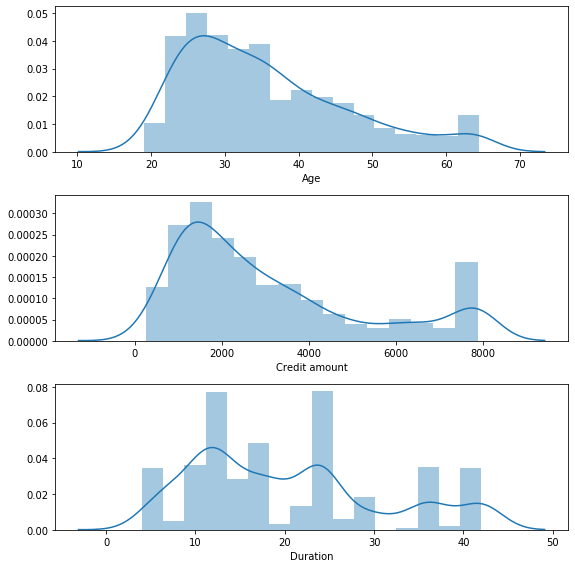

In [40]:
distributions(cluster_data)

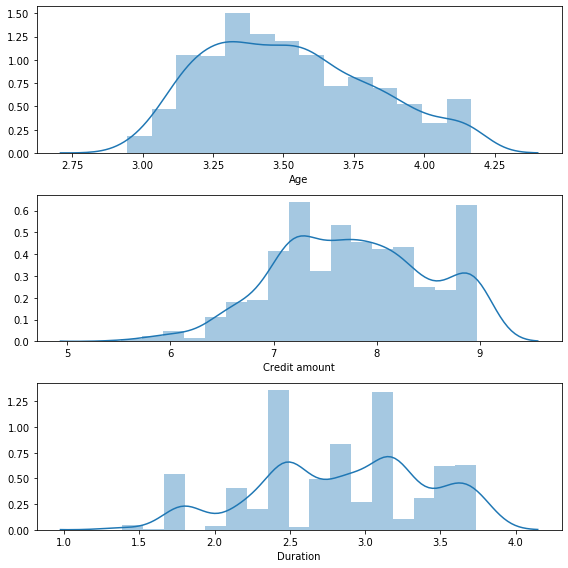

In [41]:
cluster_log = np.log(cluster_data)
distributions(cluster_log)

### Standardization

In [42]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)

## The Elbow Method

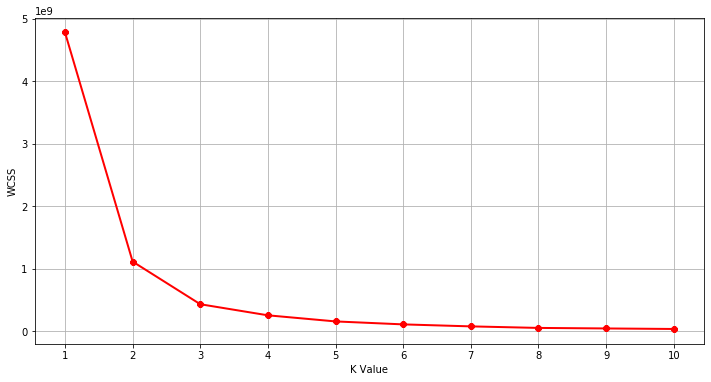

In [43]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

### Kmeans

In [45]:

km = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
data_label = pd.DataFrame(km.labels_)
clustered_data = cluster_data.assign(Cluster=data_label)



## Evaluation

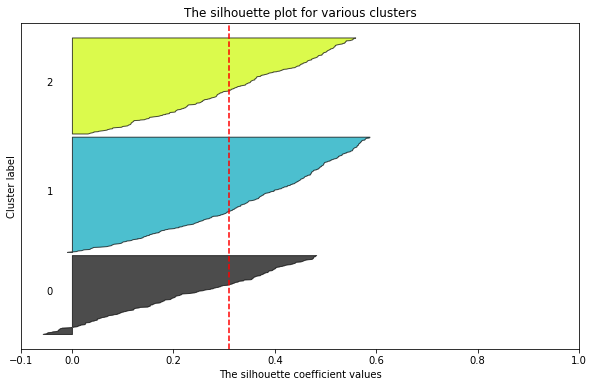

In [50]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score


clusterer = KMeans(n_clusters=3, random_state=1)
cluster_labels = clusterer.fit_predict(cluster_scaled)
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(cluster_scaled, cluster_labels)

fig, ax1 = plt.subplots(figsize=(10,6))

y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor=color, edgecolor="black", alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.get_yaxis().set_ticks([])
ax1.set_title("The silhouette plot for various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

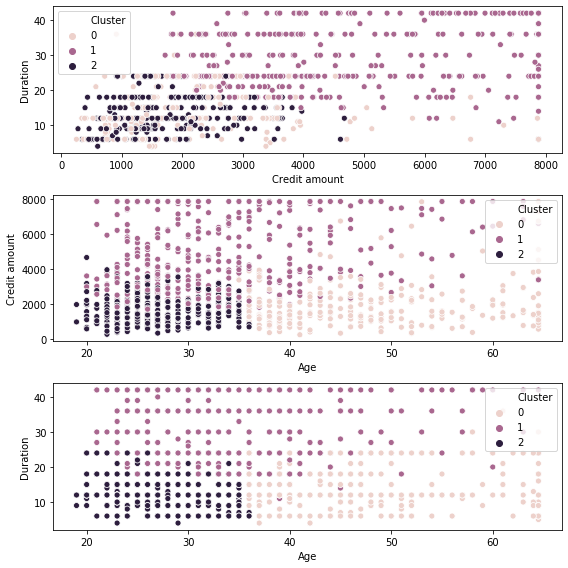

In [51]:
scatters(clustered_data, 'Cluster')

In [53]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

,Age,Credit amount,Duration
Cluster,,,
0,47.5,1906.4,14.1
1,33.9,4988.3,30.2
2,27.3,1668.3,13.6


Cluster 0 – lower mean of credit amount, short duration, older customers

Cluster 1 – high mean of credit amount, long duration, middle-aged customers

Cluster 2 - lower mean of credit amount, short duration, young customers